## P2 - Investigate a Dataset

### Student: Peter Carsten Petersen
### Date: May 11th 2016


For this Project I have reviewed the data found at http://www.seanlahman.com/baseball-archive/statistics/
and based on this I have defined the following questions, which i will answer using Data Analysis techniques with the aid of Python and Libraries Numpy and Pandas.

### Age analysis
1. Which player was the youngest at debut and which player was oldest at last game
2. What is the Average age of ball players per season in the period 1871-2015
3. Which year had the highest average age
4. Is their a possible relationship between Average age per season and length of career over time

### Wild Card analysis
5. Which Teams have earned a Wild Card per season and what is the frequency per team
6. What is the frequency of teams earning wild card per division in each League
7. Is One league better than the other in Post Season performance
8. Have any Wild card teams go on to win the World Series


## Analysis limitations

The analysis presented in this report and accompanying results/statements are delivered with the following limitations:

- Generally speaking as we have not ourselves collected the data, we cannot be completely sure as to the completeness of the datasets from which the analyzes has been made, nor can we with complete certainty make any statement as to data quality.


- We can however give some comfort to the quality of datasets as they have been worked on and update anually since 1995, also as the data in these datasets are factual rather than subjective, i.e. player data such as date of birth, date of debut etc. is not open for interpretation.  


- Main Dataset used in "Age Analysis" is in raw form 18,846 rows of data, after removing rows including missing data, the dataset is reduced to 18,202 rows of data >95% of original.


- The decision to remove missing data rather than, filling with for example the mean of existing data or using a regression model, is based on the size of raw data and the limited number of missing data rows. i.e. we are losing less than 5% of the raw data and are still left with a significant data amount. Also since we are looking at averages over time on a large dataset, the mean or regression models for filling missing data would most likely not change the overall conclusion, it would only change should the missing data in fact have included values significantly removed from the average, and none of these models if used insted would reflect this.


- The results of analyzes are based solely on the information from the datasets and calculation on these. There are however a host of other factors which could be interesting to include in the analyzes, and which could increase the quality of conclusions. Such as Historical events impacting players availability to play, collective bargaining/Salary Cap impact on young/old players respective career lenghts, relative form of WIld Card teams leading up to post season, injuries on key players, draft systems etc.


- Please note that the conclusions in the analyzes are not statistically sound conclusions, as we have not conducted any statistical testing (such as t-test, z-test etc.) where this would be relevant.  


In [1]:
# In order to do this analysis we must first import necessary libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Next we load the "master.csv" file containing detailed information for all players who have played in Major League Baseball, 
# including date of birth as well as dates for debut and last game. "master.csv" is loaded as Pandas dataframe and 
# named "baseball_df".

baseball_df = pd.read_csv('master.csv')
baseball_df.head()
    

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [2]:
# baseball_df is larger than can be viewed in jupyter, so instead we call .info on it to see some more details.

baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 24 columns):
playerID        18846 non-null object
birthYear       18703 non-null float64
birthMonth      18531 non-null float64
birthDay        18382 non-null float64
birthCountry    18773 non-null object
birthState      18220 non-null object
birthCity       18647 non-null object
deathYear       9336 non-null float64
deathMonth      9335 non-null float64
deathDay        9334 non-null float64
deathCountry    9329 non-null object
deathState      9277 non-null object
deathCity       9325 non-null object
nameFirst       18807 non-null object
nameLast        18846 non-null object
nameGiven       18807 non-null object
weight          17975 non-null float64
height          18041 non-null float64
bats            17655 non-null object
throws          17868 non-null object
debut           18653 non-null object
finalGame       18653 non-null object
retroID         18792 non-null object
bbrefID        

From above info we can see that baseball_df includes a large number of columns and since we only need a few of these to answer
the Age Analysis questions, we can extract only these to have a more manageable dataframe.
Furthermore we see that number of records for playerID/birthYear/debut/finalGame are not equal, i.e. there is missing data,
there are a number of ways to fill these, but for this exercise I have decided to remove rows with missing data, this will still leave us with more than 18.000 records >95% of total.


In [3]:
# So we create new dataframe "baseball1_df" with only the needed columns and rows with missing data removed. Furthermore 
# we reset the dataframe index so that we have and unbroken chain of index.

baseball1_df = baseball_df[['playerID','birthYear','birthMonth','birthDay','debut','finalGame']].dropna()

baseball1_df.reset_index(inplace = True)

baseball1_df.tail()


,index,playerID,birthYear,birthMonth,birthDay,debut,finalGame
18197,18841,zupofr01,1939.0,8.0,29.0,1957-07-01,1961-05-09
18198,18842,zuvelpa01,1958.0,10.0,31.0,1982-09-04,1991-05-02
18199,18843,zuverge01,1924.0,8.0,20.0,1951-04-21,1959-06-15
18200,18844,zwilldu01,1888.0,11.0,2.0,1910-08-14,1916-07-12
18201,18845,zychto01,1990.0,8.0,7.0,2015-09-04,2015-10-03


In [4]:
baseball1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18202 entries, 0 to 18201
Data columns (total 7 columns):
index         18202 non-null int64
playerID      18202 non-null object
birthYear     18202 non-null float64
birthMonth    18202 non-null float64
birthDay      18202 non-null float64
debut         18202 non-null object
finalGame     18202 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 995.5+ KB


Now we have something more manageable and as expected still more that 18,000 rows. But there are still some problems with the
data. The actual birthday is in 3 differents columns and none of the data is in a usable datetime format.
This will be fixed by adding the birthYear+birthMonth+birthDay as strings in a new column for each row, and following that
all columns needed to answer the Age Analysis questions are converted to a usable date format.

In [5]:
for x in range(len(baseball1_df.index)):
    baseball1_df.loc[x,'birthDayDate'] = str(int(baseball1_df.loc[x,'birthYear'])) + '-' + str(int(baseball1_df.loc[x,'birthMonth'])) + '-' + str(int(baseball1_df.loc[x,'birthDay']))


baseball1_df['debut'] = pd.to_datetime(baseball1_df['debut'])
baseball1_df['finalGame'] = pd.to_datetime(baseball1_df['finalGame'])
baseball1_df['birthDayDate'] = pd.to_datetime(baseball1_df['birthDayDate'])
baseball1_df.head()

,index,playerID,birthYear,birthMonth,birthDay,debut,finalGame,birthDayDate
0,0,aardsda01,1981.0,12.0,27.0,2004-04-06,2015-08-23,1981-12-27
1,1,aaronha01,1934.0,2.0,5.0,1954-04-13,1976-10-03,1934-02-05
2,2,aaronto01,1939.0,8.0,5.0,1962-04-10,1971-09-26,1939-08-05
3,3,aasedo01,1954.0,9.0,8.0,1977-07-26,1990-10-03,1954-09-08
4,4,abadan01,1972.0,8.0,25.0,2001-09-10,2006-04-13,1972-08-25


Now that data is in a similar format, we can extend dataframe with 2 new columns "ageAtDebut" and "ageAtFinal" which we can use
to answer Question 1

In [6]:
baseball1_df['ageAtDebut'] = baseball1_df['debut'] - baseball1_df['birthDayDate']
baseball1_df['ageAtFinal'] = baseball1_df['finalGame'] - baseball1_df['birthDayDate']
baseball1_df.head()

,index,playerID,birthYear,birthMonth,birthDay,debut,finalGame,birthDayDate,ageAtDebut,ageAtFinal
0,0,aardsda01,1981.0,12.0,27.0,2004-04-06,2015-08-23,1981-12-27,8136 days,12292 days
1,1,aaronha01,1934.0,2.0,5.0,1954-04-13,1976-10-03,1934-02-05,7372 days,15581 days
2,2,aaronto01,1939.0,8.0,5.0,1962-04-10,1971-09-26,1939-08-05,8284 days,11740 days
3,3,aasedo01,1954.0,9.0,8.0,1977-07-26,1990-10-03,1954-09-08,8357 days,13174 days
4,4,abadan01,1972.0,8.0,25.0,2001-09-10,2006-04-13,1972-08-25,10608 days,12284 days


In [7]:
# We start by finding the youngest player to play in the MLB, calling .idxmin on the "ageAtDebut" column
baseball1_df.loc[baseball1_df['ageAtDebut'].idxmin()]

index                            8384
playerID                    johnsbi01
birthYear                        1961
birthMonth                          9
birthDay                           28
debut             1884-06-27 00:00:00
finalGame         1892-04-27 00:00:00
birthDayDate      1961-09-28 00:00:00
ageAtDebut      -28216 days +00:00:00
ageAtFinal      -25355 days +00:00:00
Name: 8107, dtype: object

This result is clearly due to an error in the data, as birthYear for this player is recorded as 1961 and his debut is recorded as 1884, i.e. 74 years before his birth!!! We will go ahead and remove
this record and try again.

In [8]:
baseball1_df.drop(baseball1_df.index [8107], inplace=True)
baseball1_df.loc[baseball1_df['ageAtDebut'].idxmin()]

index                         12514
playerID                  nuxhajo01
birthYear                      1928
birthMonth                        7
birthDay                         30
debut           1944-06-10 00:00:00
finalGame       1966-10-02 00:00:00
birthDayDate    1928-07-30 00:00:00
ageAtDebut       5794 days 00:00:00
ageAtFinal      13943 days 00:00:00
Name: 12092, dtype: object

So youngest player to start in MLB is playerID "nuxhajo01" a further check in Wikipedia.org
https://en.wikipedia.org/wiki/Joe_Nuxhall
reveals that behind the ID is Joe Nuxhall who is recognized as youngest player to start in the MLB at 15 years 316 days


In [9]:
# To answer oldest player we call .idxmax on the "ageAtFinal" column 
baseball1_df.loc[baseball1_df['ageAtFinal'].idxmax()]

index                         12904
playerID                  paigesa01
birthYear                      1906
birthMonth                        7
birthDay                          7
debut           1948-07-09 00:00:00
finalGame       1965-09-25 00:00:00
birthDayDate    1906-07-07 00:00:00
ageAtDebut      15343 days 00:00:00
ageAtFinal      21630 days 00:00:00
Name: 12469, dtype: object

So oldest player to start in MLB is playerID "paigesa01" a further check in Wikipedia.org
https://en.wikipedia.org/wiki/List_of_oldest_Major_League_Baseball_players
reveals that behind the ID is Satchel Paige who is recognized as oldest player to play in the MLB at 59 years.


In [10]:
# In order to answer questions 2-4 in the Age Analysis we first create to new Dataframes, first one baseball2_df is a limited
# copy of baseball_df where we extract only the years for birth, debut, finalGame. 
# The analysis of question 2-4 will be done on years only. This necessary as we do not have readily available data on when each
# season started and which day it ended. This of course is a weakness in the analysis, but one which is reduced dúe to the high
# number of records being analyzed.

# First new dataframe "baseball2_df"

baseball_df['debut'] = pd.to_datetime(baseball_df['debut'])
baseball_df['debutYear'] = baseball_df['debut'].dt.year
baseball_df['finalGame'] = pd.to_datetime(baseball_df['finalGame'])
baseball_df['finalGameYear'] = baseball_df['finalGame'].dt.year

baseball2_df = baseball_df[['birthYear','debutYear','finalGameYear']].dropna()

baseball2_df['birthYear'] = pd.to_numeric(baseball2_df['birthYear'])
baseball2_df['debutYear'] = pd.to_numeric(baseball2_df['debutYear'])
baseball2_df['finalGameYear'] = pd.to_numeric(baseball2_df['finalGameYear'])

baseball2_df.head()

,birthYear,debutYear,finalGameYear
0,1981.0,2004.0,2015.0
1,1934.0,1954.0,1976.0
2,1939.0,1962.0,1971.0
3,1954.0,1977.0,1990.0
4,1972.0,2001.0,2006.0


In [11]:
# Second new dataframe "avgAge_df" created empty with 1 line for each year of recorded data, and columns needed for storing the
# data needed for calculating Average Age and Career Length per year. Following that we make a copy avgAge_df1 where index is
# set equal to year

avgAge_df = pd.DataFrame(columns=('Year', 'Total_Age', 'Count'))
year = baseball2_df['debutYear'].min()
count = 0
while year < baseball2_df['finalGameYear'].max() + 1:
    avgAge_df.loc[count,'Year'] = year
    avgAge_df.loc[count,'Total_Age'] = 0
    avgAge_df.loc[count,'Count'] = 0
    
    avgAge_df.loc[count,'Career_length'] = 0
    avgAge_df.loc[count,'Count_career'] = 0
    year +=1
    count += 1

avgAge_df1 = avgAge_df.set_index('Year')
    
    
avgAge_df1.head()

,Total_Age,Count,Career_length,Count_career
Year,,,,
1871.0,0,0,0.0,0.0
1872.0,0,0,0.0,0.0
1873.0,0,0,0.0,0.0
1874.0,0,0,0.0,0.0
1875.0,0,0,0.0,0.0


In [12]:
# In order to calculate the Average Age per year we loop through each line of the baseball2_df dataframe and loop this through
# each line of the avgAge_df1 dataframe. This is needed as most lines in baseball2_df includes data for multiple years. Everytime
# there is a hit in the avgAge_df1 the age is recorded in that year and counter is added 1.

for x in range(len(baseball2_df.index)):
        testa = baseball2_df.iloc[x]
        for y in range(int(testa['finalGameYear'] - testa['debutYear'] + 1)):
            avgAge_df1.ix[testa['finalGameYear'],'Total_Age'] += testa['finalGameYear'] - testa['birthYear']
            avgAge_df1.ix[testa['finalGameYear'],'Count'] +=1
            if testa['finalGameYear'] > 1871:  
                testa['finalGameYear'] -= 1
                
avgAge_df1.head()

,Total_Age,Count,Career_length,Count_career
Year,,,,
1871.0,2723,112,0.0,0.0
1872.0,3450,141,0.0,0.0
1873.0,3169,127,0.0,0.0
1874.0,3101,122,0.0,0.0
1875.0,4406,177,0.0,0.0


In [13]:
# Now that we have populated "Total_Age" and "Count" for each year we can calculate average dividing the two and get the answer
# to question 2

avgAge_df1['Total_Age'] = pd.to_numeric(avgAge_df1['Total_Age'])
avgAge_df1['Count'] = pd.to_numeric(avgAge_df1['Count'])
avgAge_df1['Avg_Age'] = avgAge_df1['Total_Age'] / avgAge_df1['Count']
avgAge_df1.head()

,Total_Age,Count,Career_length,Count_career,Avg_Age
Year,,,,,
1871.0,2723.0,112,0.0,0.0,24.312500
1872.0,3450.0,141,0.0,0.0,24.468085
1873.0,3169.0,127,0.0,0.0,24.952756
1874.0,3101.0,122,0.0,0.0,25.418033
1875.0,4406.0,177,0.0,0.0,24.892655


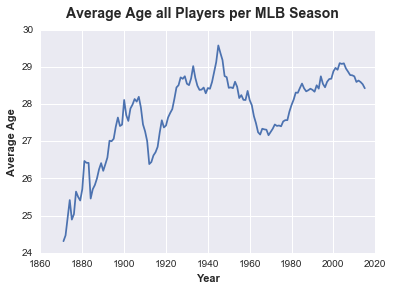

In [14]:
# Let us see that in a line chart instead as this may show a more clear picture.

sns.set_style("darkgrid")
plt.plot(avgAge_df1['Avg_Age'])
plt.suptitle('Average Age all Players per MLB Season', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=11, fontweight='bold')
plt.ylabel('Average Age', fontsize=11, fontweight='bold')
plt.show()


From this line chart we can make the following observations:
- Minimun average age was in the first year. from the Dataframe above we can see that this is 1871 and avg age was 24,3 years
- Average age has been increasing over time, but there are some peaks and valleys which would need more extensive analysis and
data in order to be correctly understood.
- Maximum average age is somewhere between 1940 and 1960, we will call .idxmax on "Avg_Age" column to find exact year and avg. age

In [15]:
avgAge_df1.loc[avgAge_df1['Avg_Age'].idxmax()]

Total_Age        24901.000000
Count              842.000000
Career_length        0.000000
Count_career         0.000000
Avg_Age             29.573634
Name: 1945.0, dtype: float64

This leads us to the answer on question 3:
- 1945 had the highest average age of ballplayers at 29,6 years.
A tentative explanation for this, is that most younger ballplayers were drafted for World War II and consequently avg.age increased.
This of course would need more extensive analysis in order to be a solid reasoning.

In [16]:
# One reason for the increasing Average Age over time could be that career length is increasing due to for example: 
# More money, better training and injury treatment, players staying longer in school. All of this would need more extensive 
# analysis and data, but we can calculate if career length is increasing and what the calculated Coorelation is vs. Avg. Age. 

# First we need a new dataframe baseball3_df, which is equal to baseball2_df but that particular dataframe cannot be re-used for
# this task as it was changed during the avg. age calculation in box [12].

# As was the case for the Average Age calculation we take baseball3_df dataframe 1 line at a time and loop through avgAge_df1
# One year at a time for possible match. Everytime there is a hit dataframe "Career length" is updated with career length in 
# that year and career count increased by 1

baseball3_df = baseball_df[['birthYear','debutYear','finalGameYear']].dropna()

for x in range(len(baseball3_df.index)):
        testa = baseball3_df.iloc[x]
        for y in avgAge_df1.index.get_values():
            if y >= testa['debutYear'] and y <= testa['finalGameYear']:
                avgAge_df1.ix[y,'Career_length'] += ((y - testa['debutYear']) + 1)
                avgAge_df1.ix[y,'Count_career'] +=1
                
avgAge_df1.head()

,Total_Age,Count,Career_length,Count_career,Avg_Age
Year,,,,,
1871.0,2723.0,112,112.0,112.0,24.312500
1872.0,3450.0,141,228.0,141.0,24.468085
1873.0,3169.0,127,302.0,127.0,24.952756
1874.0,3101.0,122,385.0,122.0,25.418033
1875.0,4406.0,177,534.0,177.0,24.892655


In [17]:
# Following this we can calculate Career length per season 

avgAge_df1['Avg_Career'] = avgAge_df1['Career_length'] / avgAge_df1['Count_career']

avgAge_df1.head()

,Total_Age,Count,Career_length,Count_career,Avg_Age,Avg_Career
Year,,,,,,
1871.0,2723.0,112,112.0,112.0,24.312500,1.000000
1872.0,3450.0,141,228.0,141.0,24.468085,1.617021
1873.0,3169.0,127,302.0,127.0,24.952756,2.377953
1874.0,3101.0,122,385.0,122.0,25.418033,3.155738
1875.0,4406.0,177,534.0,177.0,24.892655,3.016949


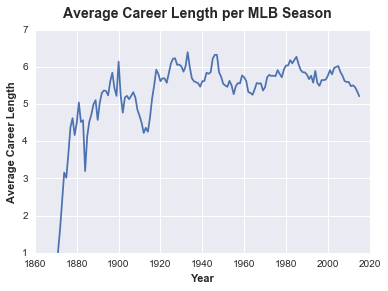

In [18]:
# And check a line chart to view if this also has an increasing trend

sns.set_style("darkgrid")
plt.plot(avgAge_df1['Avg_Career'])
plt.suptitle('Average Career Length per MLB Season', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=11, fontweight='bold')
plt.ylabel('Average Career Length', fontsize=11, fontweight='bold')
plt.show()

As was the case for Average Age, carreer length is definately increasing over time. Not surprising of course in the first years
and again there are peaks and valleys which could need more extensive analysis and further data.

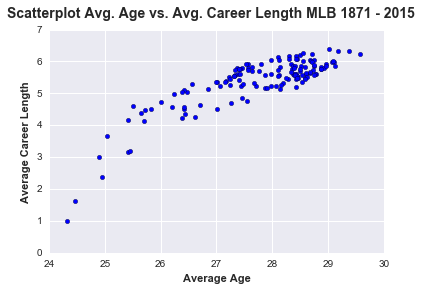

In [19]:
# In order to analyze a possible relationship between Average Age and Career Length we start by looking at a scatterplot

sns.set_style("darkgrid")
plt.scatter(x="Avg_Age", y="Avg_Career", data=avgAge_df1)
plt.suptitle('Scatterplot Avg. Age vs. Avg. Career Length MLB 1871 - 2015', fontsize=14, fontweight='bold')
plt.xlabel('Average Age', fontsize=11, fontweight='bold')
plt.ylabel('Average Career Length', fontsize=11, fontweight='bold')
plt.show()

In [20]:
# Chart above indicates a possible positive relationsship, we will check further with a calculated correlation 
# calling .corr on the dataframe. 

avgAge_df1.corr(method='pearson')

,Total_Age,Count,Career_length,Count_career,Avg_Age,Avg_Career
Total_Age,1.000000,0.998840,0.991690,0.998840,0.670732,0.511400
Count,0.998840,1.000000,0.988364,1.000000,0.646252,0.498447
Career_length,0.991690,0.988364,1.000000,0.988364,0.709883,0.586188
Count_career,0.998840,1.000000,0.988364,1.000000,0.646252,0.498447
Avg_Age,0.670732,0.646252,0.709883,0.646252,1.000000,0.843482
Avg_Career,0.511400,0.498447,0.586188,0.498447,0.843482,1.000000


Answer to question 4 is therefore that there seems to be strong relationship between Average Age and Career length = 0.84. But in order
to be more exact further statistical tests should be performed.

## Performance of WC team in Post season

From Wikipedia we can learn that the Wild Card system was introduced into the 1994 season, but due to player strike the 
Wild Card was not implemented until 1995. Until 2012 1 team from each league was awarded a Wild card and played against
a division winner for a place in the league championship series. In 2012 this changed to 2 Wild Card teams that played each
other to determine which team would advance to the division series.

This analysis will identify the Wild Card teams per season and award points for yearly performance according to the following system:
- Advancing to Division Series 1 point (this entails that all WC teams before 2012 are automatically awarded 1 point)
- Advancing to League Championship 1 point
- Advancing to World Series 1 point
- Winning World Series 1 point

So if a WC team scores 4 points in a single post season they won the World Series.

In [21]:
# In order to analyze the Performance of Wild Card teams in post season we first have to load the "SeriesPost.csv" as dataframe
# will be loaded as seriesPost_df

seriesPost_df = pd.read_csv('SeriesPost.csv')

# Let's see a preview of the data
seriesPost_df.tail()

,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
302,2015,NLWC,CHN,NL,PIT,NL,1,0,0
303,2015,NLCS,NYN,NL,CHN,NL,4,0,0
304,2015,NLDS1,CHN,NL,SLN,NL,3,1,0
305,2015,NLDS2,NYN,NL,LAN,NL,3,2,0
306,2015,WS,KCA,AL,NYN,NL,4,1,0


In [22]:
# Before we move further we would like the full name of teams, so we load Teams.csv to new Dataframe "teams_df" 

teams_df = pd.read_csv('Teams.csv')

# In this new dataframe we identify the column containing full team name and rename this to same column name in seriesPost_df

teams_df.rename(index=str, columns={"teamID": "teamIDwinner"}, inplace = True)

# We copy into new dataframe "teams1_df" only the columns we need, and further copy into teams2_df dropping duplicates
# as teams can have changed name but kept same abbreviation. 

teams1_df = teams_df[['teamIDwinner','name','yearID']]

teams2_df = teams1_df.drop_duplicates()

# and finally we merge the seriesPost_df and teams2_df into new dataframe seriesPost1_df

seriesPost1_df = seriesPost_df.merge(teams2_df)


seriesPost1_df.tail()

,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties,name
298,2015,ALDS2,TOR,AL,TEX,AL,3,2,0,Toronto Blue Jays
299,2015,NLWC,CHN,NL,PIT,NL,1,0,0,Chicago Cubs
300,2015,NLDS1,CHN,NL,SLN,NL,3,1,0,Chicago Cubs
301,2015,NLCS,NYN,NL,CHN,NL,4,0,0,New York Mets
302,2015,NLDS2,NYN,NL,LAN,NL,3,2,0,New York Mets


In [23]:
# In order to calculate performance per WC team per year , we first create new dataframe populating with the columns needed 
# from teams_df adding a column for "score" and limiting to only teams which have a "Y" in WCWin.
# Following this we loop through seriesPost1_df and each time we can match seriesPost win result with wcPerf1_df, the team is 
# added +1 point for that season. Finally all WC teams before 2012 are added +1 Point as they qualified 1 round further than post
# teams earning WC from season 2012 onwards.

wcPerf2_df = teams_df[['name','yearID','lgID','divID','WCWin']]
wcPerf2_df['Score'] = 0
wcPerf1_df = wcPerf2_df[wcPerf2_df.WCWin == "Y"]
wcPerf1_df.reset_index(inplace=True)


for x in range(len(seriesPost1_df.index)):
    testa = seriesPost1_df.iloc[x]
    for y in range(len(wcPerf1_df.index)):
        testb = wcPerf1_df.iloc[y]
        if testa['name'] == testb['name'] and testa['yearID'] == testb['yearID']:
            wcPerf1_df.loc[y,'Score'] += 1
        
            
for x in range(len(wcPerf1_df.index)):
    testa = wcPerf1_df.iloc[x]
    if testa['yearID'] < 2012:
        wcPerf1_df.loc[x,'Score'] += 1
            


wcPerf1_df.head()



C:\Users\Peter\Anaconda\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Peter\Anaconda\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,index,name,yearID,lgID,divID,WCWin,Score
0,2189,Colorado Rockies,1995,NL,W,Y,1
1,2198,New York Yankees,1995,AL,E,Y,1
2,2210,Baltimore Orioles,1996,AL,E,Y,2
3,2222,Los Angeles Dodgers,1996,NL,W,Y,1
4,2247,Florida Marlins,1997,NL,E,Y,4


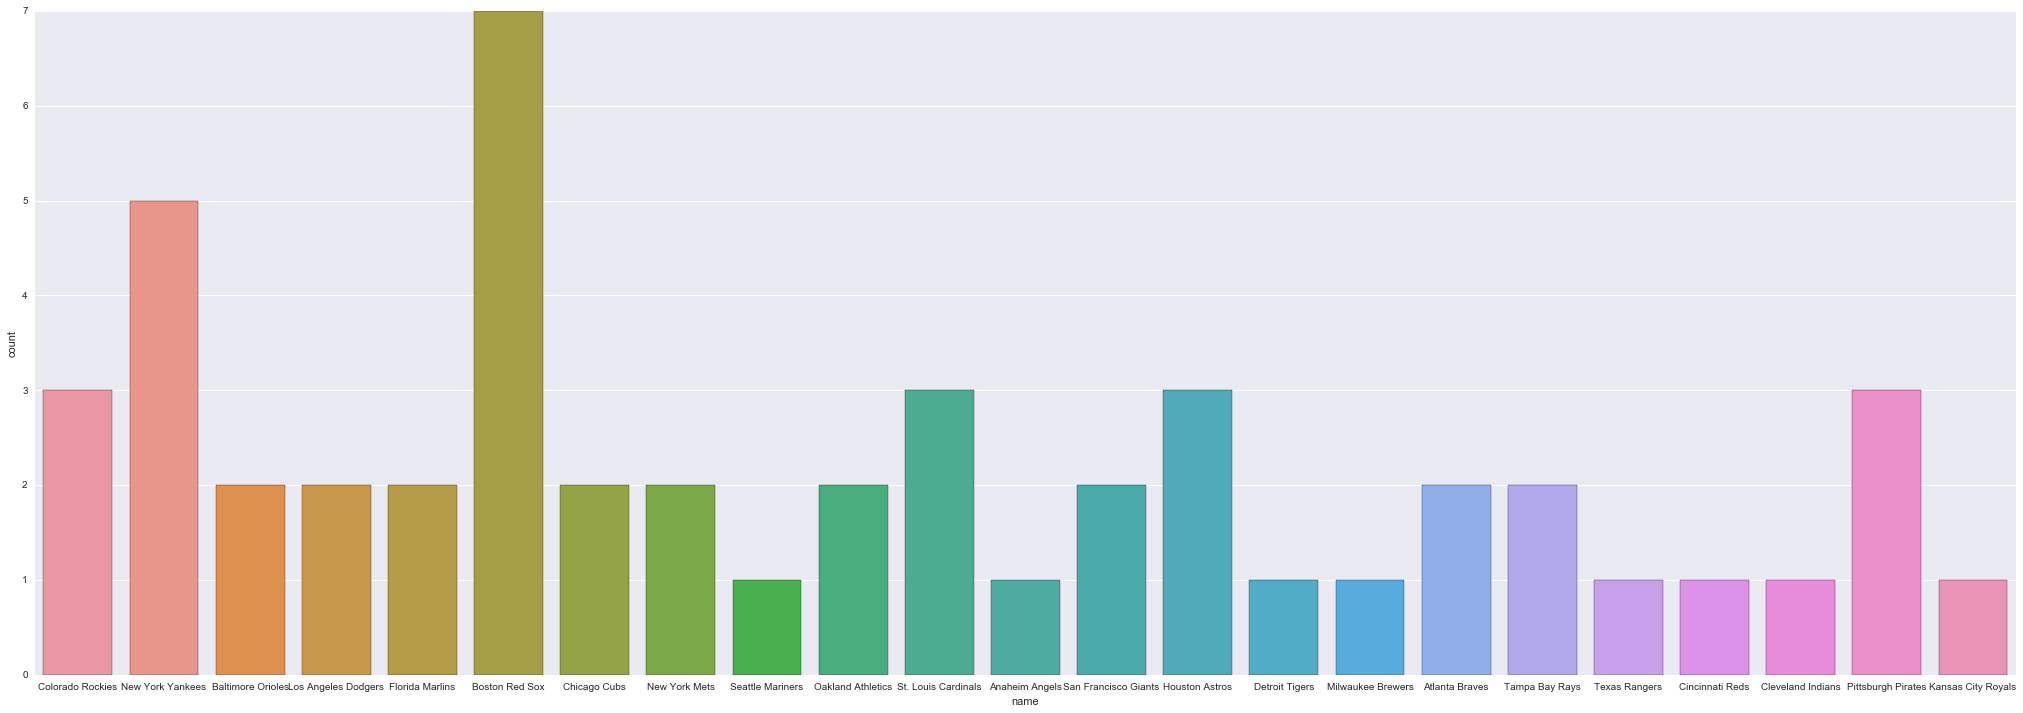

In [24]:
# So now dataframe is loaded with score per WC team per year, and we can answer question 1, we do this via a factorplot


sns.factorplot('name',kind='count',size = 10,aspect = 2.8, data=wcPerf1_df)


From this we can see that a total of 23 teams have earned a WC sometime in the period 1995 to 2015 out of a total of 30 teams.
And that most frequent team Boston Red Sox have done it 7 times followed by New York Yankees 5 times.

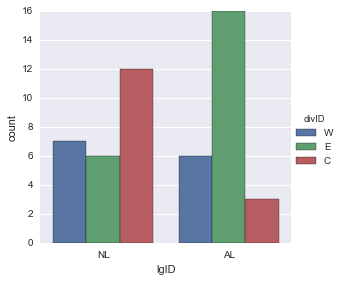

In [25]:
# In order to answer question 2 we can again use a factorplot on 'lgID' using hue='divID'

sns.factorplot('lgID',hue='divID',kind='count',data=wcPerf1_df)

Answer to Question 2 is quite clear, Central Division for NL and East division for AL are most frequent divisions to earn Wild Cards.

In [26]:
# In order to answer question 3 we call .groupby and .sum on lgID 

lgComp_df = wcPerf1_df.groupby(['lgID']).sum()
lgComp_df

,yearID,Score
lgID,,
AL,50159,37
NL,50159,45


So answer to question 3 is that WC teams in NL have performed better in post season overall than WC teams
in AL, we can further dig into the data including name also in the .groupby

In [27]:
lgComp_df = wcPerf1_df.groupby(['lgID','name']).sum()
lgComp_df

yearID  Score
lgID name                               
AL   Anaheim Angels          2002      4
     Baltimore Orioles       4008      3
     Boston Red Sox         14026     13
     Cleveland Indians       2013      0
     Detroit Tigers          2006      3
     Houston Astros          2015      1
     Kansas City Royals      2014      3
     New York Yankees       10024      5
     Oakland Athletics       4015      1
     Seattle Mariners        2000      2
     Tampa Bay Rays          4024      2
     Texas Rangers           2012      0
NL   Atlanta Braves          4022      1
     Chicago Cubs            4013      3
     Cincinnati Reds         2013      0
     Colorado Rockies        6011      5
     Florida Marlins         4000      8
     Houston Astros          4009      5
     Los Angeles Dodgers     4002      2
     Milwaukee Brewers       2008      1
     New York Mets           3999      5
     Pittsburgh Pirates      6042      1
     San Francisco Giants    4016      7
     St. Louis Cardinals     6024      7

This shows us that while there are only two teams in AL that have overall post season score of >5 "Yankees" and "Red Sox", there are 6 teams in NL that have overall score of >5 "Rockies", "Marlins", "Astros", "Mets", "Giants", "Cardinals".
This indicates that an NL team reaching post season via WC will fair better than an AL team. This conclusion however based on 
observation only and would require further statistical test to be validated.

In [28]:
# In order to answer question 4 we slice out of the dataframe rows where 'Scores' equal 4 points. 

print(wcPerf1_df.loc[wcPerf1_df['Score'] == 4])

   index                  name  yearID lgID divID WCWin  Score
4   2247       Florida Marlins    1997   NL     E     Y      4
14  2385        Anaheim Angels    2002   AL     W     Y      4
17  2426       Florida Marlins    2003   NL     E     Y      4
18  2449        Boston Red Sox    2004   AL     E     Y      4
32  2680   St. Louis Cardinals    2011   NL     C     Y      4
45  2769  San Francisco Giants    2014   NL     W     Y      4


Answer to question 4 is therefore definately Yes, a WC team has gone on to win the World Series 6 times in the 21 years there have been Wild Cards. Especially interesting is Florida Marlins two World Series Wins as WC team, if we re-visit the factor plot in box [43] we can see that also equals the number of times they have earned a Wild Card.  

## Sources:

http://www.seanlahman.com/baseball-archive/statistics/

https://en.wikipedia.org/wiki/Major_League_Baseball_wild_card

http://mlb.mlb.com/home
